In [8]:
import os
import glob
import json
from matplotlib import pyplot as plt
import numpy as np
import cv2


In [9]:
def make_gt_images(json_file_path:str, img_dir_path:str, save_dir_path:str) -> None:
    """이미지에 bbox를 그려주는 함수

    Args:
        json_file_path (str): json file의 path
        img_dir_path (str): 이미지 파일이 저장된 폴더의 path
        save_dir_path (str): bbox가 그려진 이미지를 저장할 폴더
    """
    
    # bbox를 그릴 색상 코드
    blue_color_code = (255,0,0) # BGR
    red_color_code = (0,0,255) # BGR


    # json 파일을 열어 dict로 json을 read
    with open(json_file_path) as f:
        json_obj = json.load(f)
    
    # per 이미지 루프
    for file_name in json_obj['images'].keys():
        img_file_path = os.path.join(img_dir_path,file_name)
        img = cv2.imread(img_file_path, 1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # per bbox 루프
        # 계속해서 box를 추가해서 그린다
        for word in json_obj['images'][file_name]['words']:
            points = json_obj['images'][file_name]['words'][word]["points"]
            # img = cv2.rectangle(img, np.int_(points[0]), np.int_(points[2]), red_color_code, 5) # annot가 polygon 이므로 rectangle 쓰면 안됨
            # np.int_는 float로 저장된 coord를 int로 바꾸는 함수, 오류생겨서 추가
            # 이번 프로젝트는 4개의 bbox만 있으므로 컴프리헨션을 안쓸거임
            points = np.array([np.int_(points[0]), np.int_(points[1]), np.int_(points[2]), np.int_(points[3])], np.int32)
            img = cv2.polylines(img, [points], True, blue_color_code, 5)

        # 이미지에 gt prefix를 붙여서
        img_save_path = os.path.join(save_dir_path, 'gt_' + file_name)
        # 저장한다
        cv2.imwrite(img_save_path, img)

In [10]:
json_file_path = '/opt/ml/input/data/ICDAR17_Korean/ufo/train.json'
img_dir_path = '/opt/ml/input/data/ICDAR17_Korean/images'
save_dir_path = '/opt/ml/input/data/ICDAR17_Korean/gt_images'

make_gt_images(json_file_path, img_dir_path, save_dir_path)

In [22]:
# img grid view로 보기
def show_grid_random_images(save_dir_path:str, nrow:int=3, ncol:int=3)->None:
    
    import random
    from PIL import Image
    from mpl_toolkits.axes_grid1 import ImageGrid

    file_path_list = list()

    # 지정한 폴더의 모든 파일 path 중에서
    for file_name in glob.glob(save_dir_path+'/*.jpg'):
        file_path_list.append(file_name)
    
    # nrow*ncol 개의 이미지들의 path를 가져옴
    selected_paths = random.sample(file_path_list, nrow*ncol)

    images = []

    # 선택한 이미지들을 np로 변환시키고
    for path in selected_paths:
        img = Image.open(path)
        img = np.array(img)
        images.append(img)
    
    # grid로 show
    fig = plt.figure(figsize=(30,30))
    for idx in range(len(images)):
        plt.subplot(nrow, ncol, idx+1)
        plt.imshow(images[idx])
        plt.axis('off')
        
    plt.show()
    

/tmp/ipykernel_4184/218916813.py:30: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrow, ncol, idx+1)


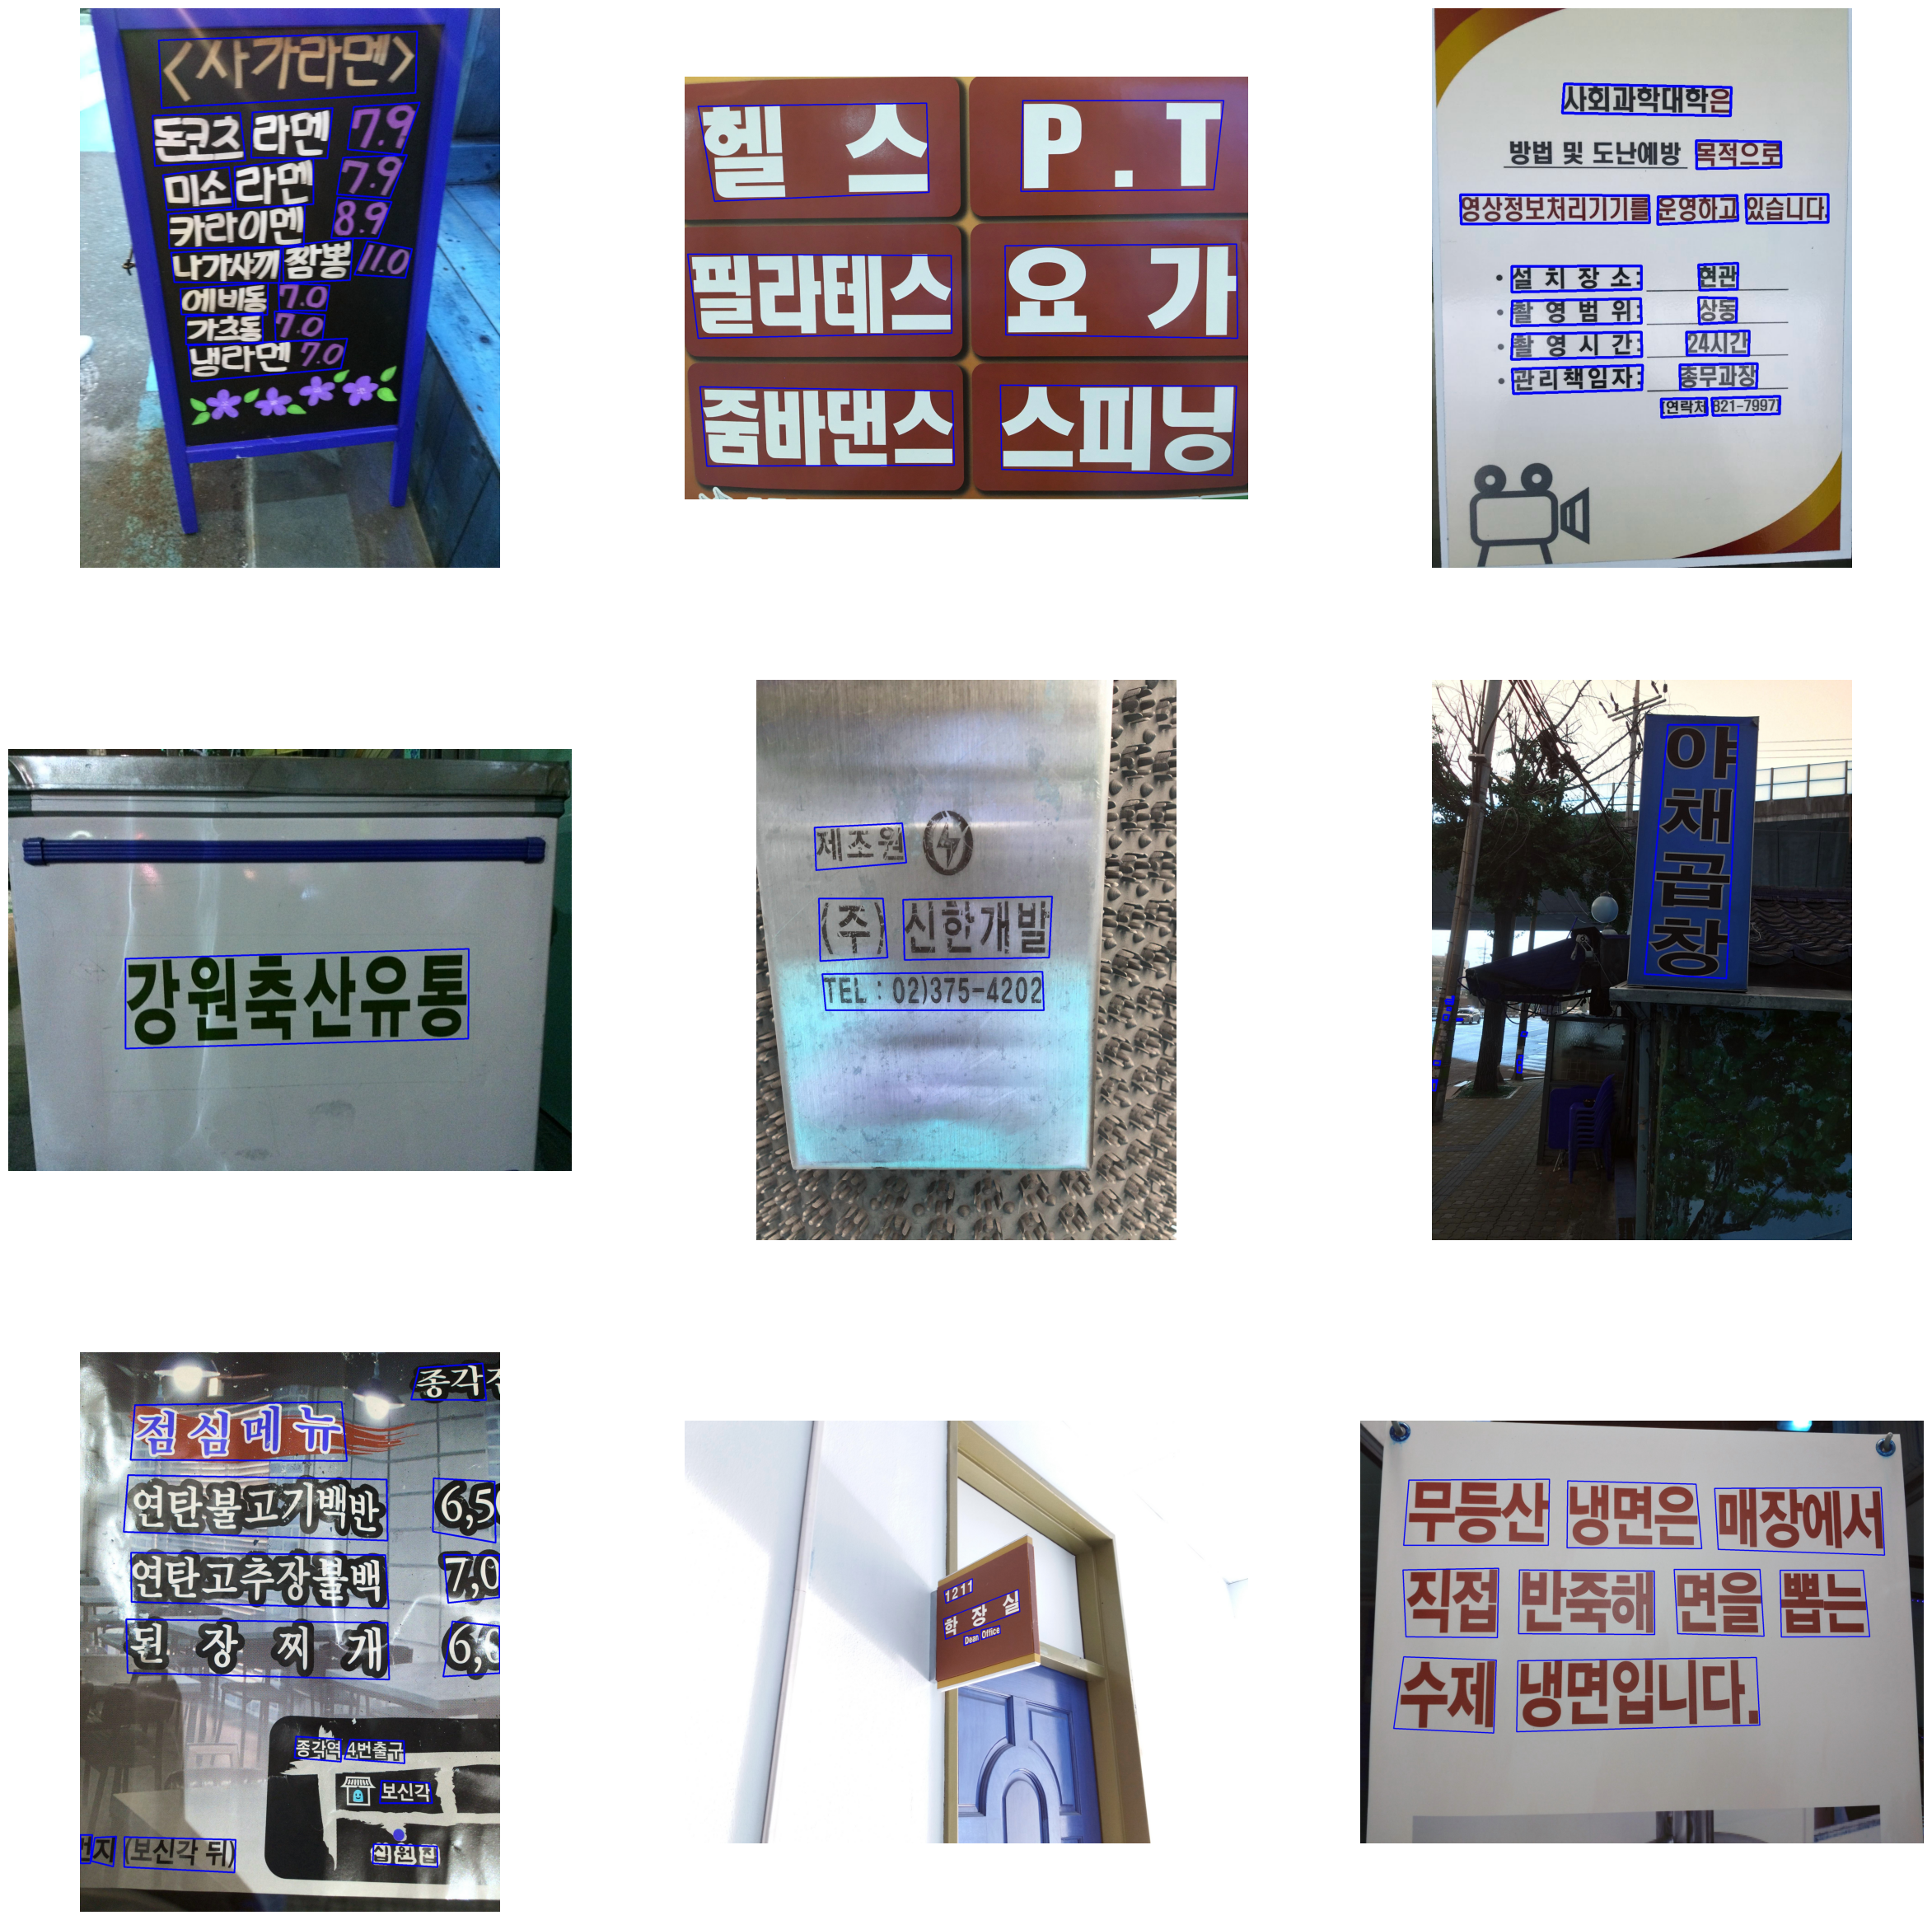

In [23]:
save_dir_path = '/opt/ml/input/data/ICDAR17_Korean/gt_images'
show_grid_random_images(save_dir_path)